# HEART DISEASE PREDICTION¶

## 1. Overview
This project predicts the likelihood of heart disease in patients based on medical attributes. It follows a complete machine learning workflow: data preprocessing, exploratory data analysis (EDA), model building

## 2. Libraries Used

- pandas: for data handling and preprocessing

- numpy: for numerical computations

- matplotlib & seaborn: for visualizations during EDA

- scikit-learn: for machine learning models, preprocessing, and evaluation metrics

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

In [2]:
# Load both files
values_df = pd.read_csv("values.csv")
labels_df = pd.read_csv("labels.csv")

# Merge on patient_id
df = pd.merge(values_df, labels_df, on="patient_id")

# Save merged dataset
df.to_csv("heart_disease_prediction.csv", index=False)

df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


- Loads the dataset.

- df.head() shows the first five rows to understand feature names and structure.

- pd.merge() it can merge two files by using common column name

#### Shape of  dataset

In [3]:
df.shape

(180, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [5]:
# finding the dulpicates
df.duplicated().sum()

0

In [6]:
# Drop patient_id (identifier, not useful for modeling)
df = df.drop(columns=['patient_id'])

In [7]:
#checking is any missing values are there

In [8]:
df.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [9]:
df.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

#### Description

In [10]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [11]:
df.describe(include=['object'])

,thal
count,180
unique,3
top,normal
freq,98


In [12]:
df['heart_disease_present'].value_counts(normalize=True)

heart_disease_present
0    0.555556
1    0.444444
Name: proportion, dtype: float64

## EDA

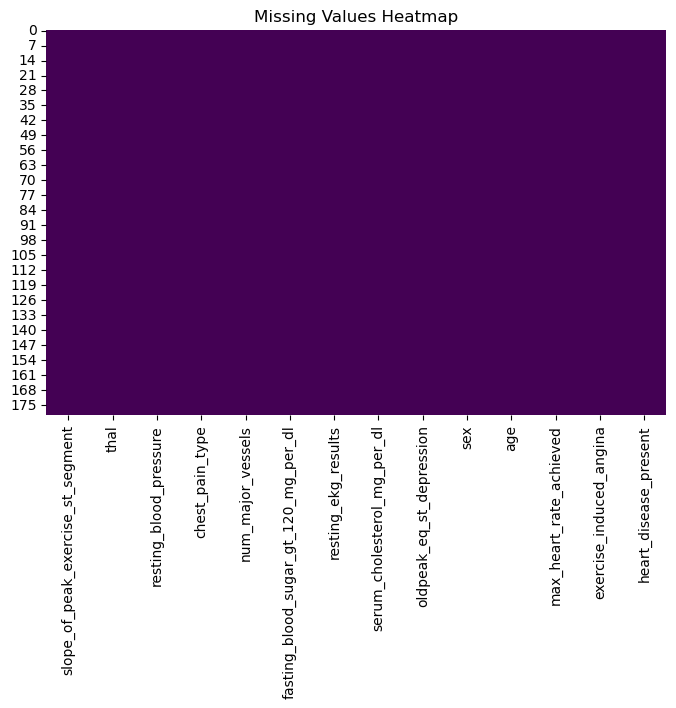

In [13]:
# Missing values heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

- In our data there is no missing values

### Analysing the Target distribution

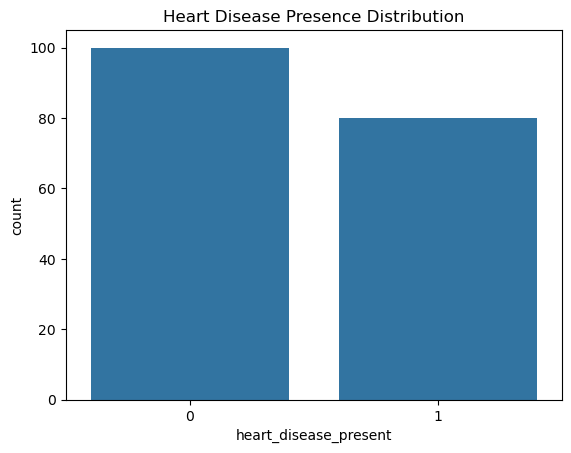

In [14]:
# Target distribution
sns.countplot(x='heart_disease_present', data=df)
plt.title('Heart Disease Presence Distribution')
plt.show()

### We will analyse the 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'age', 'max_heart_rate_achieved'

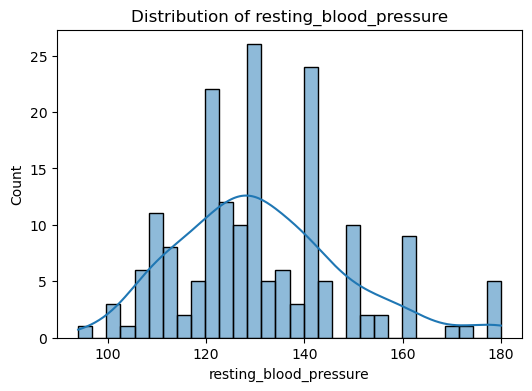

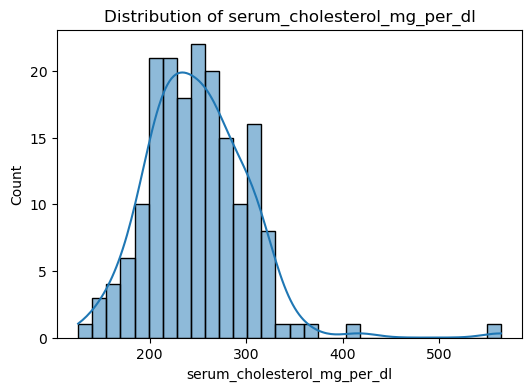

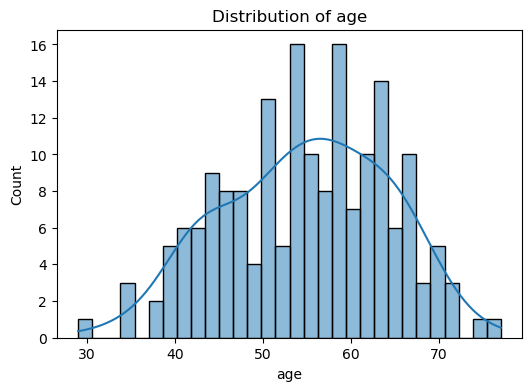

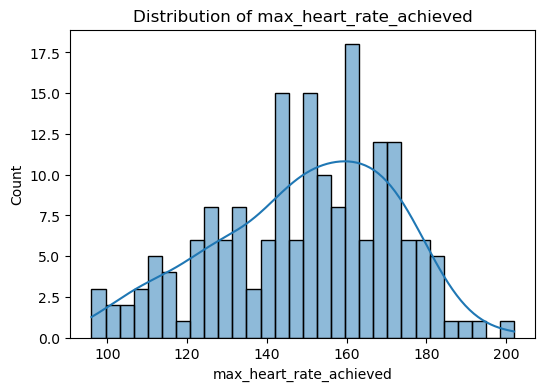

In [15]:
# Visualizing numerical features distributions
num_cols = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'age', 'max_heart_rate_achieved']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Resting Blood Pressure (mm Hg)

+ Centered around 120–140 mm Hg.

+ A noticeable right tail suggests some patients with hypertension (≥160 mm Hg).

+ Indicates possible outliers worth checking.

#### Serum Cholesterol (mg/dl)

- Skewed to the right.

- Most patients fall between 200–300 mg/dl, but several extend well beyond 400.

- Very high cholesterol levels may influence model performance; normalization could be beneficial.

#### Age

- Distribution is roughly bell-shaped, concentrated between 40–60 years.

- Very few patients are below 30 or above 70.

- Suggests data mostly represents middle-aged adults, aligning with typical heart disease risk demographics.

#### Max Heart Rate Achieved

- Peaks around 150–170 bpm.

- Fewer patients achieve below 100 or above 200.

- The spread is fairly wide, showing variability across age and fitness levels.

### Correlation Heatmap

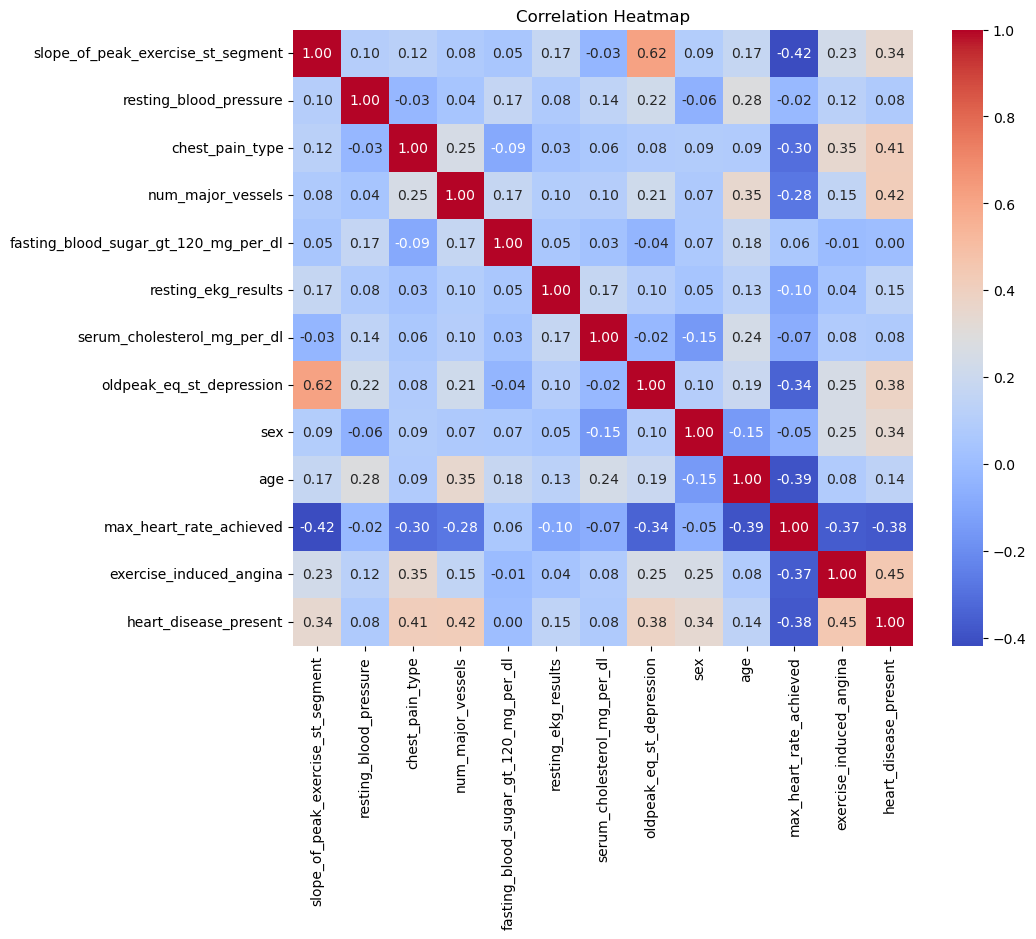

In [16]:
col = ['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina','heart_disease_present' ]
plt.figure(figsize=(10,8))
sns.heatmap(df[col].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

- Patients with exercise-induced angina, chest pain, vessel blockages, and ST depression are at higher risk of heart disease, while those with a higher maximum heart rate show lower risk.

### Boxplot 

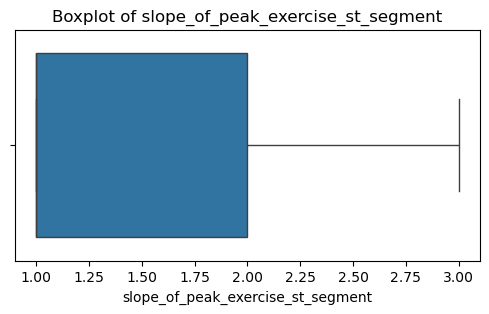

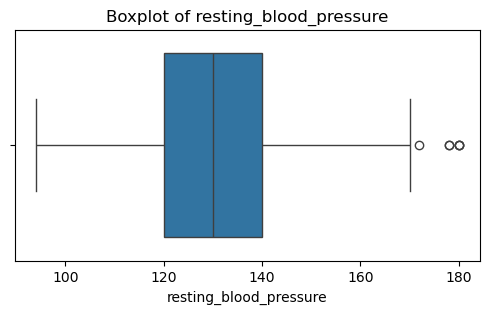

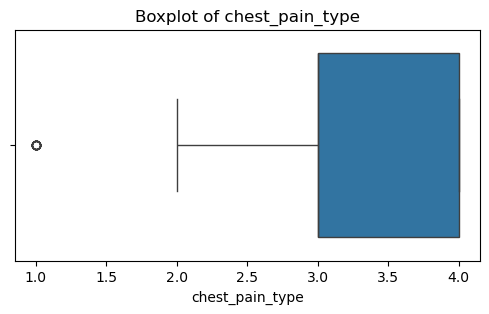

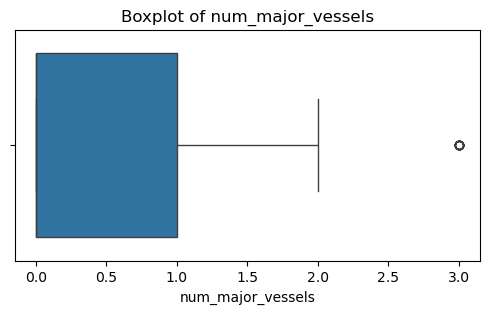

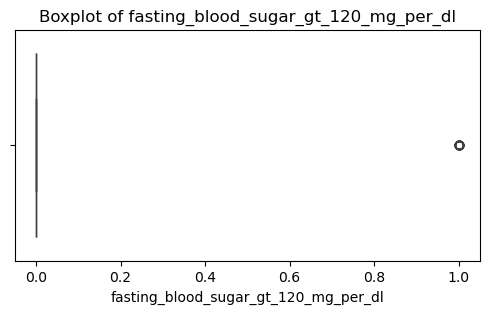

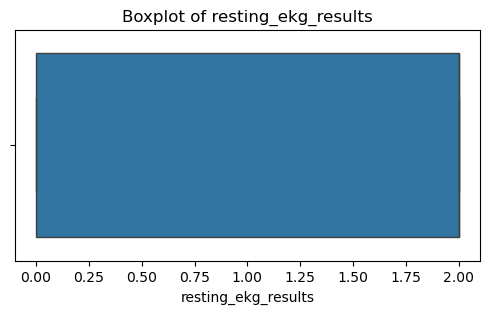

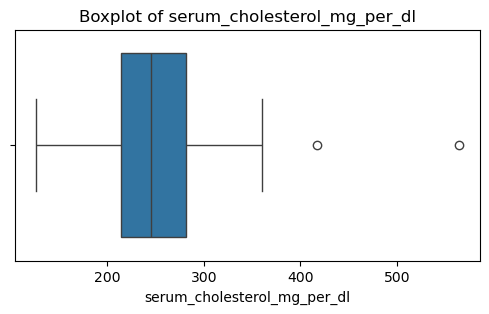

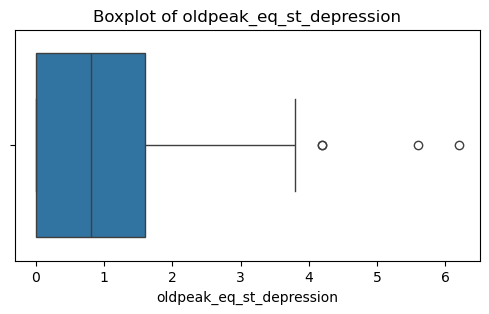

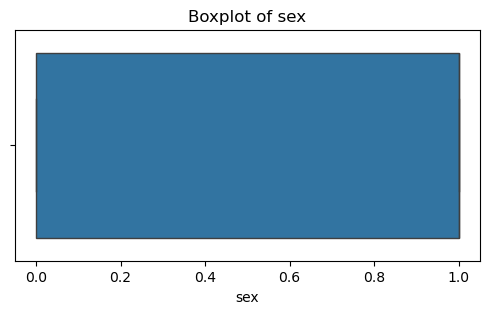

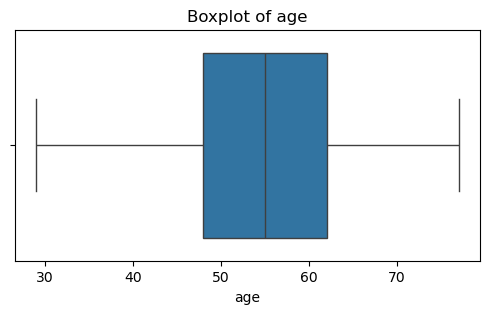

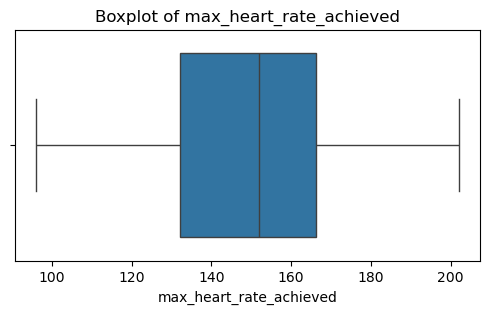

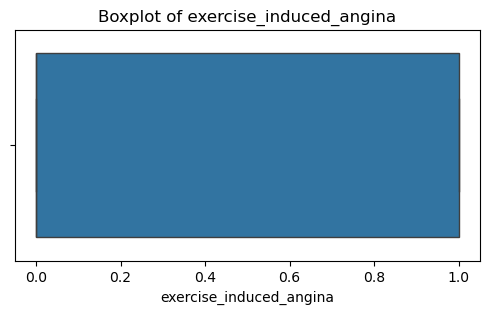

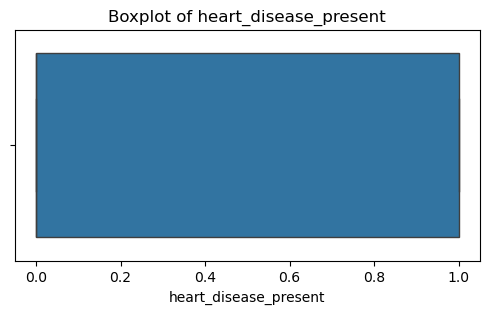

In [17]:
# Boxplots for outlier detection
for cols in col:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[cols])
    plt.title(f'Boxplot of {cols}')
    plt.show()

### Analysing Thal

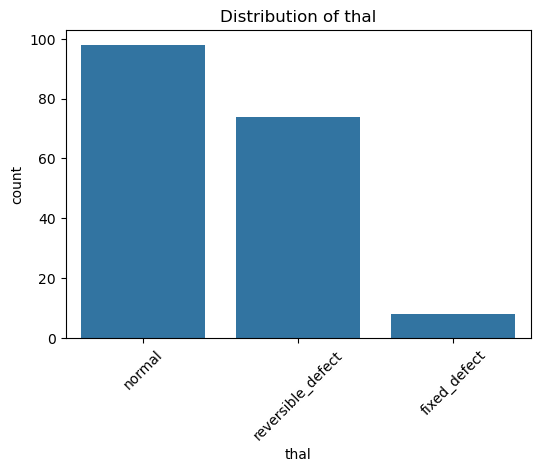

In [18]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

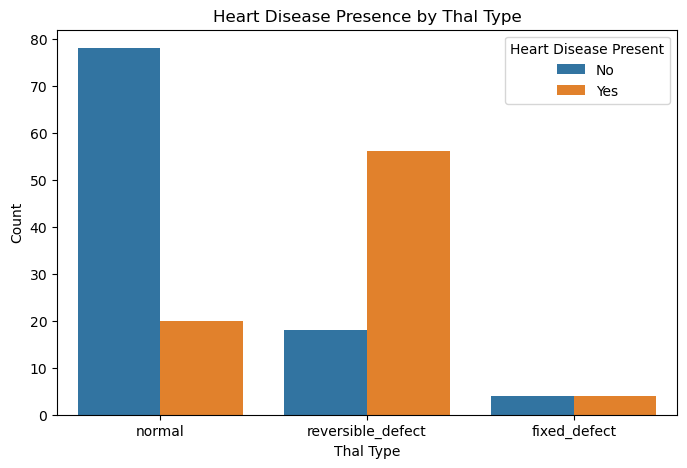

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='thal', hue='heart_disease_present')
plt.title('Heart Disease Presence by Thal Type')
plt.xlabel('Thal Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease Present', labels=['No', 'Yes'])
plt.show()

- Patients with reversible defects have a high likelihood of heart disease.

- Patients with normal thal results are mostly disease-free.

- Fixed defect cases are rare, with roughly equal presence of disease and no disease.

- Overall, thal type is a strong predictor of heart disease, with reversible defects being the highest risk factor.

### Outliers handling

In [20]:
col = ['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina','heart_disease_present' ]

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

In [21]:
df_no_outliers = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

slope_of_peak_exercise_st_segment        0
resting_blood_pressure                   6
chest_pain_type                         13
num_major_vessels                       14
fasting_blood_sugar_gt_120_mg_per_dl    29
resting_ekg_results                      0
serum_cholesterol_mg_per_dl              2
oldpeak_eq_st_depression                 4
sex                                      0
age                                      0
max_heart_rate_achieved                  0
exercise_induced_angina                  0
heart_disease_present                    0
dtype: int64


### Winzorizing

In [23]:
# Continuous columns where outliers make sense
cont_cols = ['resting_blood_pressure', 
             'serum_cholesterol_mg_per_dl', 
             'oldpeak_eq_st_depression']

# Apply Winsorization (capping)
for c in cont_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[c] = np.where(df[c] < lower, lower, df[c])
    df[c] = np.where(df[c] > upper, upper, df[c])

print(" Winsorization applied to:", cont_cols)


 Winsorization applied to: ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression']


### checking outlers 

In [24]:
Q1 = df[cont_cols].quantile(0.25)
Q3 = df[cont_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[cont_cols] < (Q1 - 1.5 * IQR)) | (df[cont_cols] > (Q3 + 1.5 * IQR))).sum()
print("Remaining outliers:\n", outliers)

Remaining outliers:
 resting_blood_pressure         0
serum_cholesterol_mg_per_dl    0
oldpeak_eq_st_depression       0
dtype: int64


## preprocessing 

In [25]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['thal', 'chest_pain_type'], drop_first=True)

In [26]:
# Separate features and target
X = df_encoded.drop('heart_disease_present', axis=1)
Y = df_encoded['heart_disease_present']

In [27]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train Test split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

In [29]:
df.shape

(180, 14)

In [30]:
X_train.shape

(144, 16)

In [31]:
X_test.shape

(36, 16)

In [32]:
Y_train.shape

(144,)

In [33]:
Y_test.shape

(36,)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model fitting

## LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
score_lr=accuracy_score(Y_pred_lr, Y_test)*100
print("accuracy achieved",score_lr)

accuracy achieved 86.11111111111111


In [36]:
Y_pred_lr.shape

(36,)

In [37]:
print(classification_report(Y_pred_lr, Y_test))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.94      0.79      0.86        19

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



## Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb=accuracy_score(Y_pred_nb, Y_test)*100
print("accuracy achieved",score_nb)

accuracy achieved 86.11111111111111


In [39]:
print(classification_report(Y_pred_nb, Y_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.76      0.86        21

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.90      0.86      0.86        36



## SVM

In [40]:
from sklearn import svm

sv = svm.SVC(kernel='linear',random_state = 42)

sv.fit(X_train, Y_train)

Y_pred_sv= sv.predict(X_test)

score_sv=accuracy_score(Y_pred_sv, Y_test)*100
print("accuracy achieved",score_sv)

accuracy achieved 83.33333333333334


In [41]:
print(classification_report(Y_pred_sv,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.81      0.81      0.81        16

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



## K Nearest Neighbors

In [42]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn=accuracy_score(Y_pred_knn, Y_test)*100
print("accuracy achieved",score_knn)

accuracy achieved 86.11111111111111


In [43]:
print(classification_report(Y_pred_knn, Y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.88      0.82      0.85        17

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state= best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt= accuracy_score(Y_pred_dt, Y_test)*100
print("accuracy achieved",score_dt,'%')

accuracy achieved 77.77777777777779 %


In [45]:
print(classification_report(Y_pred_dt,Y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.75      0.75      0.75        16

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf= accuracy_score(Y_pred_rf, Y_test)*100
print("accuracy achieved",score_rf,'%')

accuracy achieved 91.66666666666666 %


In [47]:
print(classification_report(Y_pred_rf,Y_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.84      0.91        19

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36



## XGBoost

In [48]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb= xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train,Y_train)
Y_pred_xgb = xgb.predict(X_test)

score_xgb= accuracy_score(Y_pred_xgb, Y_test)*100
print("accuracy achieved",score_xgb,'%')
print(classification_report(Y_test, Y_pred_xgb))

accuracy achieved 86.11111111111111 %
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



## Neural Network

In [49]:
!pip install tensorflow

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
# Suppose X_train has 16 columns
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))  # <-- use dynamic feature size
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # for binary classification


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5764 - loss: 0.6779
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7222 - loss: 0.6378 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7708 - loss: 0.6066 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8056 - loss: 0.5780
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8056 - loss: 0.5499 
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8333 - loss: 0.5256 
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8403 - loss: 0.4995 
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8472 - loss: 0.4788 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8403 - loss: 0.4572  
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8194 - loss: 0.4395 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8194 - loss: 0.4252 
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.840

In [53]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [54]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [55]:
score_nn= accuracy_score(Y_pred_nn, Y_test)*100
print("accuracy achieved",score_nn,'%')

accuracy achieved 80.55555555555556 %


## Output Final score

In [56]:
scores = [score_lr,score_nb,score_sv,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.11111111111111 %
The accuracy score achieved using Naive Bayes is: 86.11111111111111 %
The accuracy score achieved using Support Vector Machine is: 83.33333333333334 %
The accuracy score achieved using K-Nearest Neighbors is: 86.11111111111111 %
The accuracy score achieved using Decision Tree is: 77.77777777777779 %
The accuracy score achieved using Random Forest is: 91.66666666666666 %
The accuracy score achieved using XGBoost is: 86.11111111111111 %
The accuracy score achieved using Neural Network is: 80.55555555555556 %


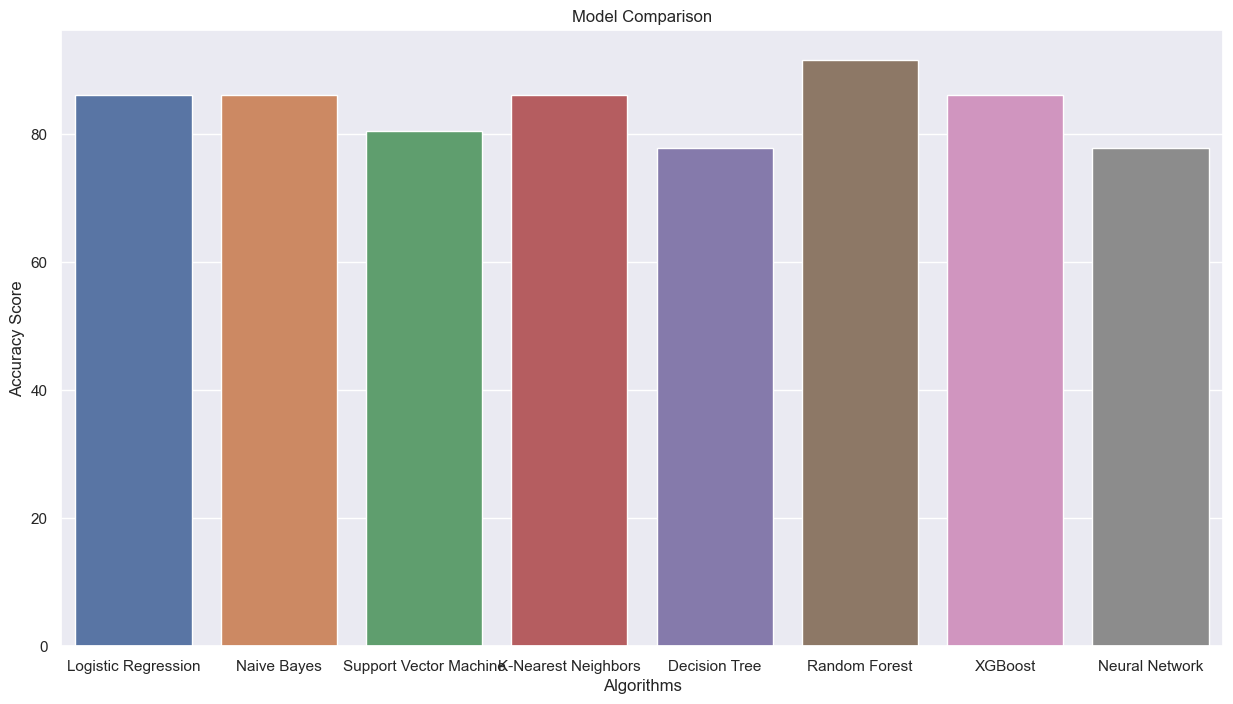

In [57]:
accuracy_scores= [86.11111111111111,86.11111111111111,80.55555555555556,86.11111111111111,77.77777777777779,91.66666666666666,86.11111111111111,77.77777777777779]
# Create a DataFrame
results = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores
})

# Plot
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(data=results, x='Algorithm', y='Accuracy',hue='Algorithm')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.show()

## random forest has good result as compare to other algorithms